In [2]:
# https://medium.com/@tomar.ankur287/user-user-collaborative-filtering-recommender-system-51f568489727

import pandas as pd
import numpy as np
import math

Ratings = pd.read_csv('data/parsed_combined_data_1.txt')



In [3]:
Ratings.columns = ['movieId', 'userId', 'rating', 'timestamp']

In [4]:
len(Ratings)

24053763

In [5]:
print(len(np.unique(Ratings['userId'])))
print(len(np.unique(Ratings['movieId'])))

470758
4499


In [6]:
import statistics
ratings_per_user = Ratings.groupby('userId')['rating'].count()
statistics.mean(ratings_per_user.tolist())

51.09581356025814

<AxesSubplot:>

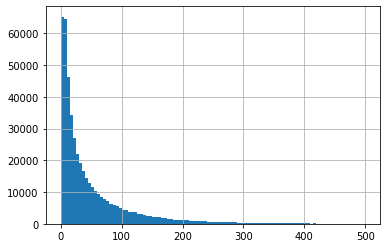

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
ratings_per_user.hist(bins=100, range=(0,500))

In [8]:
ratings_per_movie = Ratings.groupby('movieId')['rating'].count()
statistics.mean(ratings_per_movie.tolist())

5346.468770837964

<AxesSubplot:>

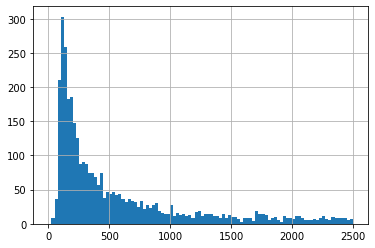

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
ratings_per_movie.hist(bins=100, range=(0,2500))


In [14]:
# counts of ratings per anime as a df
ratings_per_movie_df = pd.DataFrame(ratings_per_movie)
# remove if < 1000 ratings
filtered_ratings_per_movie_df = ratings_per_movie_df[ratings_per_movie_df.rating >= 100]
# build a list of anime_ids to keep
popular_movie = filtered_ratings_per_movie_df.index.tolist()

# counts ratings per user as a df
ratings_per_user_df = pd.DataFrame(ratings_per_user)
# remove if < 500
filtered_ratings_per_user_df = ratings_per_user_df[ratings_per_user_df.rating >= 100]
# build a list of user_ids to keep
prolific_users = filtered_ratings_per_user_df.index.tolist()

filtered_ratings = Ratings[Ratings.movieId.isin(popular_movie)]
filtered_ratings = Ratings[Ratings.userId.isin(prolific_users)]
len(filtered_ratings)



13254583

In [15]:
rating_matrix = filtered_ratings.pivot_table(index='userId', columns='movieId', values='rating')

rating_matrix = rating_matrix.fillna(0)

rating_matrix.head()



movieId,1,2,3,4,5,6,7,8,9,10,...,4490,4491,4492,4493,4494,4495,4496,4497,4498,4499
userId,,,,,,,,,,,,,,,,,,,,,
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
from sklearn.metrics.pairwise import cosine_similarity
import operator
def similar_users(user_id, matrix, k=10):
    # create a df of just the current user
    user = matrix[matrix.index == user_id]
    
    # and a df of all other users
    other_users = matrix[matrix.index != user_id]    
    # calc cosine similarity between user and each other user
    similarities = cosine_similarity(user,other_users)[0].tolist()
    
    # create list of indices of these users
    indices = other_users.index.tolist()
    
    # create key/values pairs of user index and their similarity
    index_similarity = dict(zip(indices, similarities))
    
    # sort by similarity
    index_similarity_sorted = sorted(index_similarity.items(), key=operator.itemgetter(1))
    index_similarity_sorted.reverse()
    
    # grab k users off the top
    top_users_similarities = index_similarity_sorted[:k]
    users = [u[0] for u in top_users_similarities]
    
    return users

In [45]:
def get_movie_rating(user_index, similar_user_indices, matrix, movie_id):
    
    # load vectors for similar users
    similar_users = matrix[matrix.index.isin(similar_user_indices)]
    print(similar_users[movie_id].mean(axis=0))
    

In [49]:
i = 0
with open('data/parsed_qualifying.txt', 'r') as f:
    for l in f.readlines():
        row = l.strip().split(',')
        print(row)
        similar_user_indices = similar_users(current_user, rating_matrix)
        print(similar_user_indices)
        get_movie_rating(movie_id=int(row[0]), user_index=int(row[1]), 
                        similar_user_indices=similar_user_indices,
                        matrix=rating_matrix)
        i = i + 1
        if i > 1:
            break


['1', '1046323', '2005-12-19']
[2618083, 18818, 1739801, 1044120, 2022007, 1549026, 1869725, 2537401, 1925991, 1359075]
0.0
['1', '1080030', '2005-12-23']
[2618083, 18818, 1739801, 1044120, 2022007, 1549026, 1869725, 2537401, 1925991, 1359075]
0.0
